In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [7]:

match_results_df = pd.read_csv('counter-strike/matchResults.csv',error_bad_lines=False)
teams_df = pd.read_csv('counter-strike/teams.csv',error_bad_lines=False)

b'Skipping line 38872: expected 29 fields, saw 43\n'
C:\Users\Pornima\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15,17,23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
match_results_df.head()

,Date,Map,Team 1 ID,Team 1 Start Side,Team 1 Score,Team 1 Half 1 Score,Team 1 Half 2 Score,Team 1 Overtime Score,Team 2 ID,Team 2 Start Side,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,8/12/14,Inferno,5411,T,10,4,6,0,5617,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/12/14,Dust2,5568,T,16,10,6,0,5617,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/12/14,Dust2,5107,T,16,14,2,0,5076,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/12/14,Mirage,5107,T,16,9,7,0,5076,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/12/14,Dust2,5642,T,6,3,3,0,5568,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
match_results_df.describe()

,Team 1 ID,Team 1 Score,Team 1 Half 1 Score,Team 1 Half 2 Score,Team 1 Overtime Score,Team 2 ID,Team 2 Score,Team 2 Half 1 Score,Team 2 Half 2 Score,Team 2 Overtime Score,Unnamed: 16,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
count,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,39879.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,6218.869681,13.418742,7.867700,5.212067,0.338975,6302.331503,12.346548,7.126508,4.899947,0.295920,8347.0,16.0,9.0,7.0,0.0,7187.0,11.0,6.0,5.0,0.0
std,1002.528124,4.490056,3.269619,2.923209,1.410180,1003.248251,4.956505,3.269913,3.064983,1.319785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4411.000000,0.000000,0.000000,0.000000,0.000000,4411.000000,0.000000,0.000000,0.000000,0.000000,8347.0,16.0,9.0,7.0,0.0,7187.0,11.0,6.0,5.0,0.0
25%,5395.000000,11.000000,5.000000,3.000000,0.000000,5569.000000,9.000000,5.000000,3.000000,0.000000,8347.0,16.0,9.0,7.0,0.0,7187.0,11.0,6.0,5.0,0.0
50%,6211.000000,16.000000,8.000000,5.000000,0.000000,6290.000000,14.000000,7.000000,5.000000,0.000000,8347.0,16.0,9.0,7.0,0.0,7187.0,11.0,6.0,5.0,0.0
75%,6959.000000,16.000000,10.000000,7.000000,0.000000,7059.000000,16.000000,10.000000,7.000000,0.000000,8347.0,16.0,9.0,7.0,0.0,7187.0,11.0,6.0,5.0,0.0
max,8446.000000,46.000000,15.000000,14.000000,31.000000,8447.000000,42.000000,15.000000,16.000000,27.000000,8347.0,16.0,9.0,7.0,0.0,7187.0,11.0,6.0,5.0,0.0


# Most Popular Teams

In [10]:
def winner(row):
    if row['Team 1 Score'] > row['Team 2 Score']:
        return row['Team 1 ID']
    else:
        return row['Team 2 ID']

In [11]:
match_results_df['Winner'] = match_results_df.apply(lambda row: winner(row), axis=1)

In [12]:
matches_won_by_team = match_results_df.groupby('Winner').size().sort_values(ascending=False)

In [13]:
matches_played_by_team1 = match_results_df.groupby('Team 1 ID').size()
matches_played_by_team2 = match_results_df.groupby('Team 2 ID').size()
matches_played_by_team = matches_played_by_team1.add(matches_played_by_team2, fill_value=0)
matches_played_by_team = matches_played_by_team.sort_values(ascending=False)

In [14]:
matches_won_by_team[:5]

Winner
4991    621
5422    562
5378    553
5752    549
5310    536
dtype: int64

In [16]:
matches_played_by_team[:5]

5378    1010.0
5310     999.0
5422     963.0
4991     928.0
5395     897.0
dtype: float64

In [17]:
matches_played_won = pd.concat([matches_won_by_team, matches_played_by_team], axis=1)

In [19]:
matches_played_won.columns = ['Won', 'Played']

In [20]:
matches_played_won = matches_played_won.reset_index()

In [21]:
matches_played_won.columns = ['ID', 'Won', 'Played']

In [22]:
played_won_named = teams_df.merge(matches_played_won, on='ID')

In [23]:
played_won_named['Ratio'] = played_won_named['Won'] / played_won_named['Played']

# Which teams played the most matches?

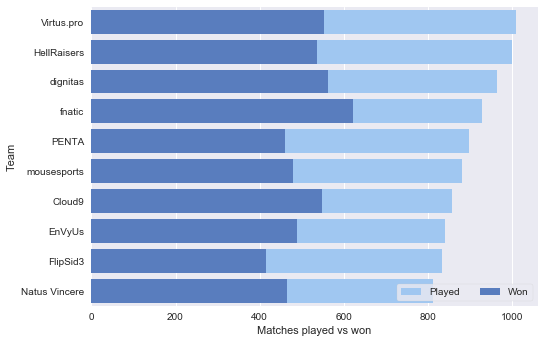

In [24]:
f, ax = plt.subplots()

data = played_won_named.sort_values('Played', ascending=False)[:10]

sns.set_color_codes("pastel")
sns.barplot(data=data, x='Played', y='Name', label='Played', color='b', 
            orient='h')

sns.set_color_codes("muted")
sns.barplot(data=data, x='Won', y='Name', label='Won', color='b',
            orient='h')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Team", xlabel="Matches played vs won")
sns.despine(left=True, bottom=True)

# Best teams that played over 500 matches

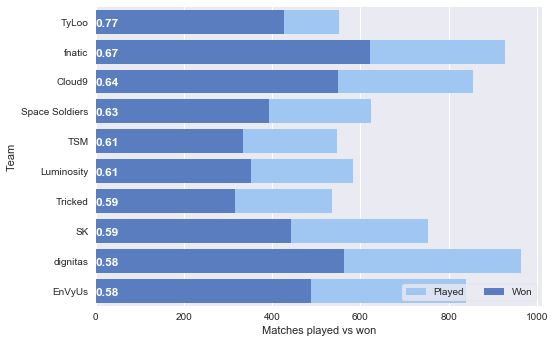

In [25]:
f, ax = plt.subplots()

data = played_won_named[played_won_named['Played'] > 500].sort_values('Ratio',
                                                                      ascending=False)[:10]

sns.set_color_codes("pastel")
sns.barplot(data=data, x='Played', y='Name', label='Played', color='b', 
            orient='h')

sns.set_color_codes("muted")
sns.barplot(data=data, x='Won', y='Name', label='Won', color='b',
            orient='h')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Team", xlabel="Matches played vs won")
sns.despine(left=True, bottom=True)

ratio = data['Ratio'][:10]

for i, v in enumerate(ratio):
    ax.text(v, i + .15, f'{v:{0}.{2}}', color='white', fontweight='bold')

# Which teams played overtime the most times?

In [26]:
overtime_matches = match_results_df[(match_results_df['Team 1 Overtime Score'] > 0) 
                                    | (match_results_df['Team 2 Overtime Score'] > 0)]

In [27]:
team1_overtime = overtime_matches[['Team 1 ID']].groupby("Team 1 ID").size()
team2_overtime = overtime_matches[['Team 2 ID']].groupby("Team 2 ID").size()

In [28]:
teams_overtime = pd.DataFrame(team1_overtime.add(team2_overtime))

In [30]:
teams_overtime = teams_overtime.reset_index()
teams_overtime.columns=['ID', 'Overtime']

In [31]:
teams_overtime_labeled = pd.merge(teams_df, teams_overtime, on='ID')

In [32]:
teams_overtime_labeled = teams_overtime_labeled.sort_values('Overtime', 
                                                            ascending=False)

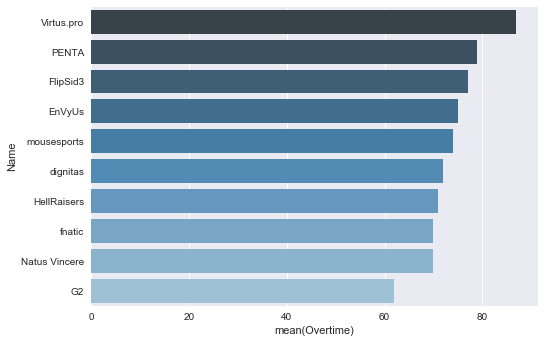

In [33]:
sns.barplot(x='Overtime', y='Name', data=teams_overtime_labeled[:10],
            orient='h', palette='Blues_d')

# Which maps are the most popular?

In [34]:
maps = match_results_df.groupby('Map').size()

In [35]:
maps = maps.sort_values(ascending=False)

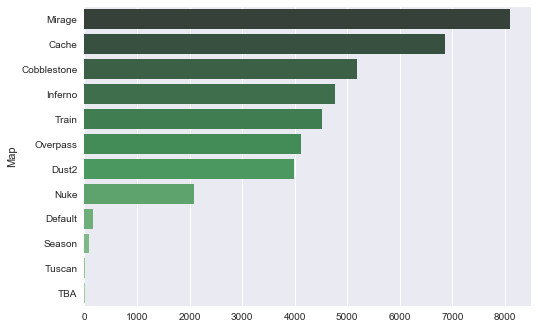

In [36]:
sns.barplot(maps, y=maps.index, palette='Greens_d')

# Which side is more successful? (by map)

In [37]:
successful_side = match_results_df[['Team 1 Start Side',
                                    'Team 1 Half 1 Score',
                                    'Team 2 Start Side',
                                    'Team 2 Half 1 Score',
                                    'Team 1 Half 2 Score',
                                    'Team 2 Half 2 Score',
                                    'Map']]

In [38]:
successful_side.head()

,Team 1 Start Side,Team 1 Half 1 Score,Team 2 Start Side,Team 2 Half 1 Score,Team 1 Half 2 Score,Team 2 Half 2 Score,Map
0,T,4,CT,11,6,5,Inferno
1,T,10,CT,5,6,6,Dust2
2,T,14,CT,1,2,2,Dust2
3,T,9,CT,6,7,3,Mirage
4,T,3,CT,12,3,4,Dust2


In [39]:
successful_side = successful_side[successful_side['Map'] != "Tuscan"]
successful_side = successful_side[successful_side['Map'] != "TBA"]

In [40]:
won_CT = successful_side[successful_side['Team 1 Start Side'] == 'CT']

In [41]:
won_TT = successful_side[successful_side['Team 1 Start Side'] == 'T']

In [42]:
won_CT_sum1 = pd.DataFrame([won_CT['Team 1 Half 1 Score'] 
                            + won_CT['Team 2 Half 2 Score'],
                            won_CT['Map']]).T

In [43]:
won_TT_sum1 = pd.DataFrame([won_TT['Team 1 Half 1 Score'] 
                            + won_TT['Team 2 Half 2 Score'],
                            won_TT['Map']]).T

In [44]:
won_CT_sum2 = pd.DataFrame([won_TT['Team 2 Half 1 Score'] 
                            + won_TT['Team 1 Half 2 Score'],
                            won_TT['Map']]).T

In [45]:
won_TT_sum2 = pd.DataFrame([won_CT['Team 2 Half 1 Score'] 
                            + won_CT['Team 1 Half 2 Score'],
                            won_CT["Map"]]).T

In [46]:
won_CT_sum1.columns = ["CT", 'Map']
won_CT_sum2.columns = ["CT", 'Map']
won_TT_sum1.columns = ["T", 'Map']
won_TT_sum2.columns = ["T", 'Map']

In [47]:
won_CT = pd.concat([won_CT_sum1, won_CT_sum2])
won_TT = pd.concat([won_TT_sum1, won_TT_sum2])

In [48]:
won_CT = won_CT.groupby("Map").sum()
won_TT = won_TT.groupby("Map").sum()

In [49]:
rounds_won_by_map = pd.concat([won_CT, won_TT], axis=1)

In [50]:
rounds_won_by_map

,CT,T
Map,,
Cache,86023,87051
Cobblestone,64172,65983
Default,2178,1955
Dust2,49411,50516
Inferno,63076,56557
Mirage,108990,94169
Nuke,29867,22586
Overpass,55392,48448
Season,1033,1060


In [51]:
rounds_won_by_map = rounds_won_by_map.sort_values(by='CT')

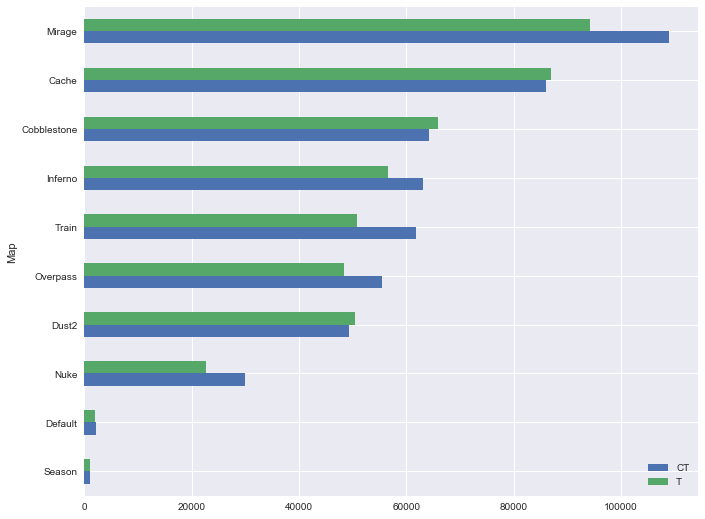

In [52]:
rounds_won_by_map.plot(kind='barh', figsize=(11, 9), sort_columns=False)

# Where do players come from?

In [53]:
players_df = pd.read_csv('counter-strike/players.csv',error_bad_lines=False)

In [54]:
players_by_country = players_df.groupby('Country').size()

In [55]:
players_by_country = players_by_country.sort_values(ascending=False)

In [56]:
top_10 = players_by_country[:10]
bottom_10 = players_by_country[-10:]

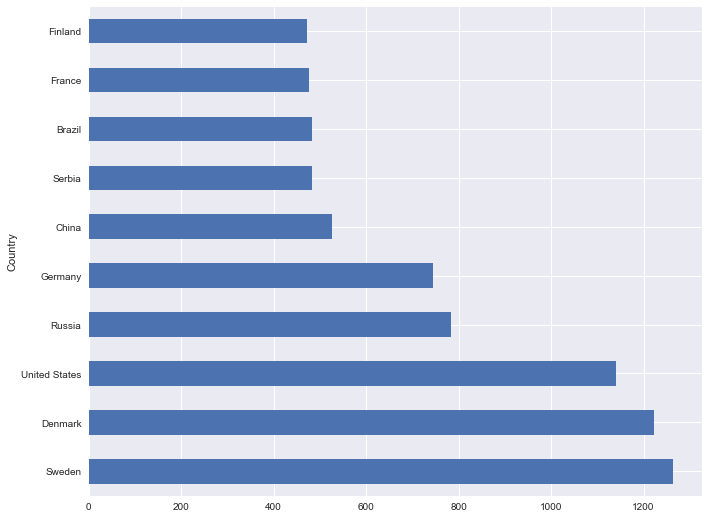

In [57]:
top_10.plot(kind='barh', figsize=(11, 9))

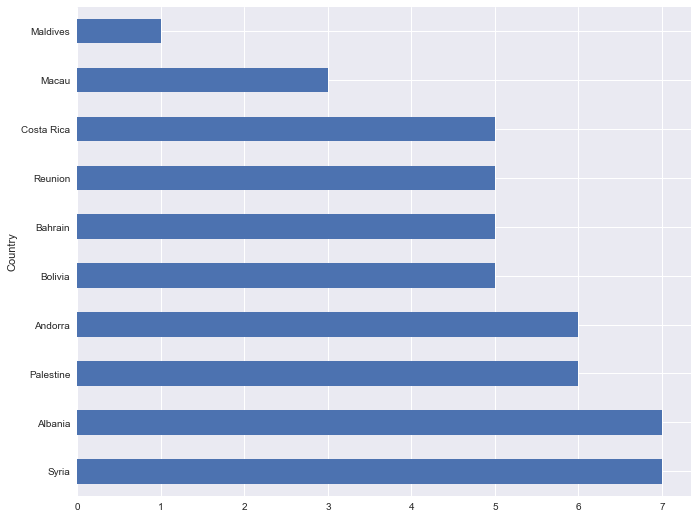

In [58]:
bottom_10.plot(kind='barh', figsize=(11, 9))

# Players

In [60]:
player_stats_df = pd.read_csv('counter-strike/playerStats.csv',error_bad_lines=False)

In [61]:
player_stats_df.head()

,Map,Player,Kills,Deaths,ADR,KAST%,Rating,MatchID
0,Nuke,4216,22,19,85.0,69.0,1.17,2311133/binary-dragons-vs-alpha-binary-dragons...
1,Nuke,3543,26,23,83.5,58.6,1.10,2311133/binary-dragons-vs-alpha-binary-dragons...
2,Nuke,3972,20,23,78.2,75.9,1.02,2311133/binary-dragons-vs-alpha-binary-dragons...
3,Nuke,2476,17,20,68.1,79.3,0.97,2311133/binary-dragons-vs-alpha-binary-dragons...
4,Nuke,2299,17,20,66.3,65.5,0.86,2311133/binary-dragons-vs-alpha-binary-dragons...


In [62]:
player_stats_df.describe()

,Player,Kills,Deaths,ADR,KAST%,Rating
count,228595.000000,228595.000000,228595.000000,228594.000000,228595.000000,228595.000000
mean,8209.531740,17.716625,17.755205,75.577796,69.014697,1.062497
std,3678.321151,6.428259,4.939568,19.184585,12.656866,0.352446
min,2.000000,0.000000,0.000000,0.600000,5.600000,0.020000
25%,7205.000000,13.000000,15.000000,62.500000,60.900000,0.820000
50%,8786.000000,17.000000,18.000000,74.600000,69.600000,1.040000
75%,10671.000000,22.000000,20.000000,87.500000,77.800000,1.280000
max,15582.000000,91.000000,94.000000,206.700000,100.000000,3.450000


# Kills

In [63]:
most_kills = player_stats_df.groupby('Player')['Kills'].sum().sort_values(ascending=False)

In [64]:
most_kills = pd.DataFrame(most_kills).reset_index()

In [65]:
most_kills['ID'] = most_kills['Player']
most_kills.drop('Player', 1, inplace=True)

In [66]:
most_kills_labeled = most_kills.merge(players_df, 
                                      on='ID').sort_values('Kills', 
                                                           ascending=False)

# Most

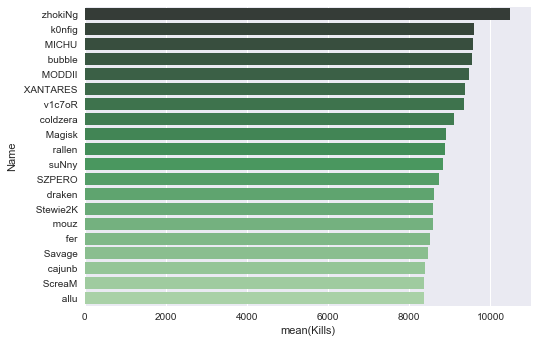

In [67]:
sns.barplot(data=most_kills_labeled[:20], x='Kills', 
            y='Name', orient='h', palette='Greens_d')

# Least

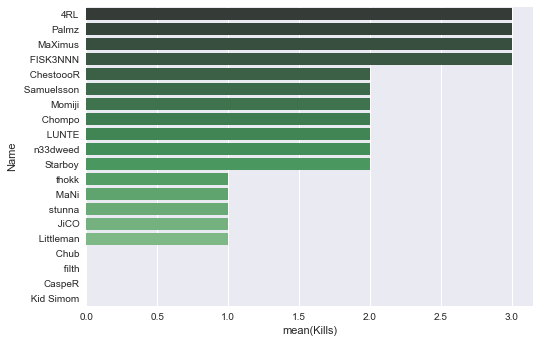

In [68]:
sns.barplot(data=most_kills_labeled[-20:], x='Kills', 
            y='Name', orient='h', palette='Greens_d')

# Rating

In [69]:
best_rating = player_stats_df.groupby('Player')['Rating'].mean().sort_values(ascending=False)

In [70]:
best_rating = pd.DataFrame(best_rating).reset_index()

In [71]:
best_rating['ID'] = best_rating['Player']
best_rating.drop('Player', 1, inplace=True)

In [72]:
best_rating = best_rating.merge(players_df, 
                                on='ID').sort_values('Rating', 
                                                     ascending=False)

# Best

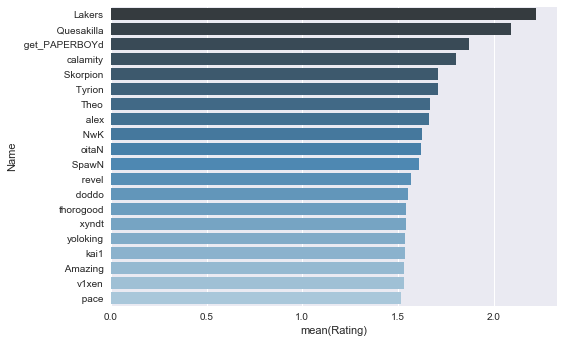

In [73]:
sns.barplot(data=best_rating[:20], x='Rating',
            y='Name', orient='h', palette='Blues_d')

# Worst

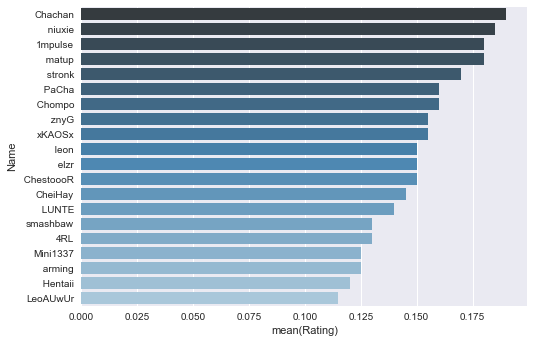

In [74]:
sns.barplot(data=best_rating[-20:], x='Rating',
            y='Name', orient='h', palette='Blues_d')